# COVID-19 Deaths Analysis

This notebook provides an analysis of the different country-level factors that may influence the impact of the coronavirus pandemic in a country.

We first consider if having more time to prepare, that is, having been hit by the disease at a later time, has helped countries mitigate their number of deaths. 

Afterwards, we take into account UN statistics about the countries affected, in order to investigate which metrics correlate with number of deaths, at the same stage of spread of the disease in each country.

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats  as stats

## Reading in COVID-19 death data

The CSV contains columns representing the total numbers of deaths attributed to COVID-19 on each country at that date.

In [40]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
deaths_pivot = pd.read_csv(url)
deaths_pivot.sample(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
117,NaN,Gabon,-0.8037,11.6094,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
121,NaN,Ghana,7.9465,-1.0232,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,5,5,5,5,5,5,5,5,5,5,5,6,6,6,8,8,8,8,8,8,8,9,9,9
45,Saskatchewan,Canada,52.9399,-106.4509,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,2,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4
34,NaN,Cameroon,3.8480,11.5021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,6,6,6,6,7,8,9,9,9,9,10,10,12,12,12,12,14,17,22,22,22,42,42
36,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,14,17,17,19,24,24,31,31,38,38,38,39,43,48,50,58,58,69,69,72,75,77,78,81,82


## Preparing death data 

In [41]:
# taking a look at Province/State
# can group by Country/Region?
deaths_pivot[['Province/State','Country/Region']][-pd.isna(deaths_pivot['Province/State'])].sort_values('Country/Region')

,Province/State,Country/Region
8,Australian Capital Territory,Australia
9,New South Wales,Australia
10,Northern Territory,Australia
11,Queensland,Australia
12,South Australia,Australia
13,Tasmania,Australia
14,Victoria,Australia
15,Western Australia,Australia
231,Diamond Princess,Canada
238,Recovered,Canada


In [42]:
# checking Diamond Princess in Canada
# negligible amount, can be grouped
deaths_pivot[deaths_pivot['Province/State'] == 'Diamond Princess']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
231,Diamond Princess,Canada,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1


In [43]:
# checking Recovered in Canada
# negligible amount, can be grouped
deaths_pivot[deaths_pivot['Province/State'] == 'Recovered']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
238,Recovered,Canada,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
# before grouping, let's unpivot the dataframe
id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long']

deaths = deaths_pivot.melt(id_vars=id_vars, var_name='Date', value_name='Deaths')
deaths.sample(5)

,Province/State,Country/Region,Lat,Long,Date,Deaths
2120,Australian Capital Territory,Australia,-35.4735,149.0124,1/30/20,0
4944,NaN,Saudi Arabia,24.0000,45.0000,2/9/20,0
11212,NaN,Guinea,9.9456,-9.6966,3/4/20,0
18339,NaN,Guatemala,15.7835,-90.2308,3/31/20,1
14398,NaN,Kenya,-0.0236,37.9062,3/16/20,0


In [45]:
# grouping by the columns we will include
deaths.drop(columns=['Lat', 'Long'], inplace=True)
deaths = deaths.groupby(['Country/Region','Date']).sum().reset_index()

# renaming col for convenience and graphs
deaths.rename({'Country/Region': 'Country'}, axis=1, inplace=True)
# sorting
deaths.sort_values(['Country', 'Date'], inplace=True)

# converting Date column
deaths.Date = pd.to_datetime(deaths.Date)

deaths.sample(5)

,Country,Date,Deaths
11664,Panama,2020-03-23,6
6910,Hungary,2020-04-01,20
7421,Ireland,2020-03-11,1
15102,Togo,2020-04-11,3
4479,Dominica,2020-03-09,0


## Getting days since first death in the country

In [46]:
country_info = deaths[deaths.Deaths > 0].drop_duplicates(subset=['Country'])[['Country','Date']]
country_info.rename({'Date': 'Date_1st_Death'}, axis=1, inplace=True)
country_info.sample(5)

,Country,Date_1st_Death
10230,Monaco,2020-03-29
14441,Sweden,2020-03-11
8680,Lebanon,2020-03-10
4720,Egypt,2020-03-10
13552,Singapore,2020-03-21


In [47]:
# we merge the dfs to obtain Days_Since_1st_Death
deaths_merge = deaths.merge(country_info, on=['Country'], how='left')
deaths['Days_Since_1st_Death'] = deaths_merge.Date - deaths_merge.Date_1st_Death
# https://stackoverflow.com/questions/25646200/python-convert-timedelta-to-int-in-a-dataframe/42247228
deaths['Days_Since_1st_Death'] = deaths.Days_Since_1st_Death.dt.days
deaths.sample(5)

,Country,Date,Deaths,Days_Since_1st_Death
9559,Maldives,2020-02-18,0,NaN
13555,Singapore,2020-03-24,2,3.0
12284,Qatar,2020-03-14,0,-14.0
8525,Laos,2020-03-05,0,NaN
5977,Ghana,2020-02-08,0,-42.0


In [48]:
# getting when the country had their first death 
# in terms of how long after the first recorded death in the world
country_info['Days_After'] = (country_info.Date_1st_Death - country_info.Date_1st_Death.min()).dt.days
country_info.sort_values('Days_After')

,Country,Date_1st_Death,Days_After
3240,China,2020-01-22,0
11981,Philippines,2020-02-10,19
7754,Japan,2020-02-13,22
5506,France,2020-02-15,24
14687,Taiwan*,2020-02-16,25
7220,Iran,2020-02-19,28
8122,"Korea, South",2020-02-20,29
4252,Diamond Princess,2020-02-20,29
7583,Italy,2020-02-21,30
15421,US,2020-02-29,38


## Getting number of deaths at the same height of spread in each country

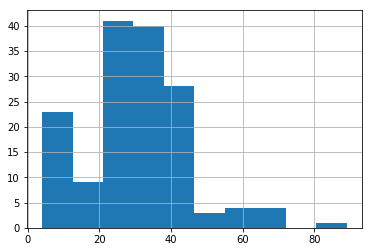

In [49]:
# looking for a good cut-off of how many days into the pandemic to look at for each country
deaths.groupby(['Country']).max()['Days_Since_1st_Death'].hist();

In [50]:
ns = [15, 20, 25, 30, 50, 70]
for n in ns:
    print ("Percent of countries at least %d days into the pandemic:" % (n))
    print (len(deaths[(deaths['Days_Since_1st_Death'] == n) & (deaths['Deaths'] != 0)])/len(set(deaths.Country)))

Percent of countries at least 15 days into the pandemic:
0.7027027027027027
Percent of countries at least 20 days into the pandemic:
0.6864864864864865
Percent of countries at least 25 days into the pandemic:
0.5567567567567567
Percent of countries at least 30 days into the pandemic:
0.43243243243243246
Percent of countries at least 50 days into the pandemic:
0.06486486486486487
Percent of countries at least 70 days into the pandemic:
0.010810810810810811


Twenty days seems like a good height to adopt, with enough days past to get significant numbers, while also applying to most countries.

In [51]:
# getting deaths 20 days after first death
n = 20
col_n = 'Deaths_Day_'+str(n)
deaths_dayn = deaths[deaths.Days_Since_1st_Death == n][['Country', 'Deaths']]
country_info = country_info.merge(deaths_dayn)
country_info.rename({'Deaths': col_n}, axis=1, inplace=True)

## Did it help to have more time to prepare?

We now look at the correlation between number of deaths on a country 20 days after its first death (Deaths_Day_20), and how many days the country had to prepare for the disease, represented by the number of days between the first death reported in the world and the first death reported in the country (Days_After).

In [52]:
corr = country_info.corr().iloc[0,1]
print ('Correlation between Days_After and Deaths_Day_20: %2f' % (corr))

Correlation between Days_After and Deaths_Day_20: -0.166802


Though there is a negative correlation as could be expected, it is weak. This can be visually grasped by having a look at the scatterplot between the two variables:

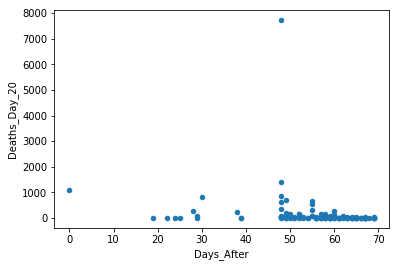

In [53]:
country_info.sort_values(col_n, ascending=False).plot.scatter(x='Days_After', y=col_n);

In [55]:
def get_corr_signif(df, x, y):
    '''
    INPUT - df - pandas dataframe - containing the two columns to test for correlation
            x - string - the name of the first column
            y - string - the name of the other column
    OUTPUT - 
            tuple - Pearson correlation and p-value
    '''
    df_clean = df[(-pd.isna(df[x])) & (-pd.isna(df[y]))]
    return stats.pearsonr(df_clean[x], df_clean[y])

In [56]:
p = get_corr_signif(country_info, 'Days_After', 'Deaths_Day_20')[1]
print ('p-value of correlation between Days_After and Deaths_Day_20: %2f' % (p))

p-value of correlation between Days_After and Deaths_Day_20: 0.060885


The p-value obtained confirms the intuition that the correlation is weak and not confirmable.

This indicates that having had more time to prepare didn't necessarily help a country much in mitigating the impacts of the pandemic, when looking at number of deaths after 20 days. 

Could it be partly explained by the fact that the pandemic hit some of the most well-prepared countries first, such as Singapore and South Korea? Or could this mean that some of the measures taken by governments are less effective than we could hope for?

## Reading in UN country-level stats

We now turn to UN data on countries in order to investigate possible correlations with the impact of COVID-19.

In [57]:
# https://www.kaggle.com/sudalairajkumar/undata-country-profiles#country_profile_variables.csv
un_stats = pd.read_csv("country_profile_variables.csv")

In [58]:
pd.options.display.max_columns = 50
un_stats.head()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population),Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)","Life expectancy at birth (females/males, years)","Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,23.3,53.3,61.6,10.0,28.5,8.6,19.3/83.6,125,125,1458,3568,-2110,-5121,3.2,26.7,4.0,5.3,63.5/61.0,43.2/4.1,382.4/1.2,1513.1,68.6,8.2,0.3,3.3,91.1/131.6,39.7/70.7,3.7/13.3,27.7,61.6,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,26.0,51.7,41.4,18.3,40.3,15.8,40.2/61.0,134,134,1962,4669,-2707,-1222,-0.1,57.4,2.2,1.7,79.9/75.6,17.4/19.0,57.6/2.0,8.8,14.6,5.9,1.3,3.5,111.7/115.5,92.5/98.8,68.1/48.7,22.9,106.4,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,37.3,50.5,10.8,34.5,54.7,11.4,17.0/70.7,160,161,29992,47091,-17099,-27229,2.0,70.7,2.8,3.0,76.5/74.1,29.3/9.4,242.4/0.6,99.8,27.7,7.2,...,...,112.7/119.5,101.7/98.1,45.1/28.9,31.6,113.0,38.2,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99
3,American Samoa,Polynesia,199,56,278.2,103.6,-99,-99,-99.0,-99,-99.0,-99.0,...,...,...,...,.../...,112,112,-99,-99,-99,-99,-~0.0,87.2,-0.1,2.6,77.8/71.1,33.3/9.0,23.2/41.8,-99,9.6,-99.0,-99,-99,-99,-99,-99,-99.0,...,-99,92,87.9,-99,-99,-99,100.0/100.0,62.5/62.5,-99,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,10.8,88.6,-99,-99,-99,-99,-99,-99,-99,100,1355,-1255,-99,-1.6,85.1,0.1,1.2,-99,14.4/19.0,42.1/59.7,-99,-99,8.1,3.7,3.3,-99,-99,-99,32.1,88.1,96.9,13,34.0,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99


## Preparing UN data

In [59]:
# many of the columns are already recognized as numerical
# including several that may be of interest to include in our analysis
un_stats.describe()

,Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),GDP per capita (current US$),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),Urban population (% of total population),Health: Total expenditure (% of GDP),Seats held by women in national parliaments %,Individuals using the Internet (per 100 inhabitants),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Net Official Development Assist. received (% of GNI)
count,2.290000e+02,229.000000,229.000000,2.290000e+02,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.0
mean,3.275679e+04,462.824891,100.202183,3.214339e+05,14251.877729,15.958952,46.408734,99.270742,100.043668,59.508734,-11.248908,1.861572,198.711790,2464.262009,80.847162,-99.0
std,1.332751e+05,2305.384253,28.327837,1.478690e+06,23391.266933,38.684631,48.603730,62.787137,63.198988,25.206404,39.924937,45.674635,296.453089,9912.891745,121.808263,0.0
min,1.000000e+00,0.100000,-99.000000,-9.900000e+01,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,0.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.0
25%,4.310000e+02,35.900000,96.400000,2.078000e+03,1207.900000,15.400000,47.300000,98.000000,98.000000,39.800000,3.400000,7.200000,55.000000,2.000000,19.000000,-99.0
50%,5.448000e+03,88.100000,99.000000,1.625100e+04,4836.100000,25.500000,59.500000,111.000000,112.000000,59.900000,5.600000,17.100000,97.000000,108.000000,47.000000,-99.0
75%,1.919300e+04,222.800000,101.700000,1.179550e+05,16344.100000,32.800000,70.700000,130.000000,130.000000,79.600000,7.800000,27.100000,196.000000,961.000000,103.000000,-99.0
max,1.409517e+06,25969.800000,301.200000,1.803665e+07,169491.800000,79.900000,94.000000,199.000000,199.000000,100.000000,17.100000,61.300000,2358.000000,101394.000000,952.000000,-99.0


In [60]:
# apart form those, it'd be interesting to consider two more:
# Population age distribution (0-14 / 60+ years, %)
# Health: Physicians (per 1000 pop.)
# let's see why those are not being interpreted as numerical

In [61]:
# Population age distribution (0-14 / 60+ years, %)
# "/" separates the two values of the column
print (un_stats['Population age distribution (0-14 / 60+ years, %)'].unique())

['43.2/4.1' '17.4/19.0' '29.3/9.4' '33.3/9.0' '14.4/19.0' '46.8/4.0'
 '23.3/7.6' '23.9/10.9' '24.9/15.4' '20.0/16.9' '17.9/19.7' '19.0/21.0'
 '14.1/25.1' '23.3/10.1' '20.5/13.5' '19.7/4.6' '28.4/7.3' '19.1/21.0'
 '16.7/21.3' '17.1/24.6' '31.4/6.2' '42.7/5.0' '14.8/24.9' '26.5/7.3'
 '31.6/9.5' '-99' '14.1/23.4' '31.4/6.4' '21.7/12.6' '.../...' '23.0/8.0'
 '14.2/27.7' '45.2/3.9' '45.0/4.4' '30.2/6.9' '31.3/7.1' '42.7/4.8'
 '16.0/23.5' '18.3/6.7' '43.2/5.5' '47.1/4.0' '14.5/24.5' '20.3/16.0'
 '11.5/23.5' '13.3/16.1' '17.7/16.2' '23.5/11.6' '39.8/4.9' '42.3/5.2'
 '26.9/14.2' '21.6/13.6' '14.7/26.8' '16.0/20.1' '16.8/18.5' '15.4/25.6'
 '20.6/13.5' '46.3/4.7' '16.5/25.3' '31.1/6.4' '29.3/10.2' '28.4/10.5'
 '33.5/7.9' '27.4/11.6' '37.2/4.4' '41.8/5.3' '16.4/25.9' '40.6/5.3'
 '16.4/15.7' '21.0/22.5' '28.5/9.9' '16.4/27.8' '18.1/25.7' '33.2/8.4'
 '23.3/11.9' '35.9/6.4' '45.3/3.8' '19.2/20.8' '13.1/28.0' '38.5/5.3'
 '18.1/22.4' '14.2/26.5' '21.0/13.2' '26.3/10.5' '18.6/23.6' '24.7/14.0'
 '35.1/6

In [62]:
split_cols = ['Population age distribution (0-14, %)', 'Population age distribution (60+, %)']
un_stats[split_cols] = un_stats['Population age distribution (0-14 / 60+ years, %)'].str.split('/',expand=True)
un_stats[split_cols].head()

,"Population age distribution (0-14, %)","Population age distribution (60+, %)"
0,43.2,4.1
1,17.4,19.0
2,29.3,9.4
3,33.3,9.0
4,14.4,19.0


In [63]:
# "..." is being used for missing values and '~0.0' should be approximated to 0.0
print (un_stats['Health: Physicians (per 1000 pop.)'].unique())

['0.3' '1.3' '...' '-99' '3.7' '3.8' '2.8' '3.4' '5.2' '0.9' '0.4' '4.1'
 '3.0' '0.1' '0.5' '1.9' '1.5' '4.0' '~0.0' '0.2' '2.5' '1.2' '3.1' '7.5'
 '3.6' '1.7' '0.8' '3.3' '3.2' '4.8' '6.3' '0.7' '3.9' '2.3' '2.6' '2.4'
 '2.1' '4.3' '2.9' '6.6' '0.6' '4.4' '1.6' '1.1' '2.0' '2.2' '2.7' '6.4'
 '1.0']


In [64]:
# we can see that some missing values are also represented by -99
print (un_stats['Net Official Development Assist. received (% of GNI)'].unique())

[-99]


In [65]:
# we should first of all replace them by NaN
un_stats = un_stats.applymap(lambda x: np.nan if str(x) in ['-99', '...'] else x)
# and we can drop the column that has only NaNs
un_stats.drop(columns=['Net Official Development Assist. received (% of GNI)'], inplace=True)
# and convert '~0.0'
un_stats = un_stats.applymap(lambda x: .0 if str(x) == '~0.0' else x)

In [66]:
# converting the three cols we want to add
un_stats['Health: Physicians (per 1000 pop.)'] = pd.to_numeric(un_stats['Health: Physicians (per 1000 pop.)'])
un_stats['Population age distribution (0-14, %)'] = pd.to_numeric(un_stats['Population age distribution (0-14, %)'])
un_stats['Population age distribution (60+, %)'] = pd.to_numeric(un_stats['Population age distribution (60+, %)'])

In [67]:
# some countries' names are different between datasets
# importing matching CSV
country_match = pd.read_csv('country_matching.csv')

In [68]:
country_match.tail()

,un_stats_country,deaths_country
174,Viet Nam,Vietnam
175,Western Sahara,Western Sahara
176,Yemen,Yemen
177,Zambia,Zambia
178,Zimbabwe,Zimbabwe


In [69]:
# merging un_stats with country_match and then with country_info
un_stats = un_stats.merge(country_match, left_on='country', right_on='un_stats_country')
un_stats = un_stats.merge(country_info, left_on='country', right_on='Country')
drop_cols = ['un_stats_country', 'deaths_country', 'Country', 'Date_1st_Death', 'Days_After']
un_stats.drop(columns=drop_cols, inplace=True)

## What country-level stats correlate the most with number of deaths?

In [157]:
def get_corr_df(df, x_list, y):
    '''
    INPUT - df - pandas dataframe - containing the columns to test for correlation
            x_list - list - containing the columns to test for correlation with y
            y - string - the name of the other column
    OUTPUT - 
            pandas dataframe - containing correlation and significance for each of x_list versus y
    '''
    corr_series = df[x_list].apply(lambda x: get_corr_signif(df, x.name, y))
    corr = [x[0] for x in corr_series]
    signif = [x[1] for x in corr_series]
    features = corr_series.index
    return pd.DataFrame({'correlation': corr, 'significance': signif}, index=features).sort_values('significance')

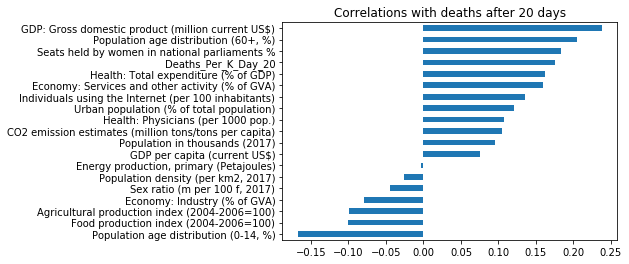

In [162]:
# plotting correlations with deaths after 20 days
title = 'Correlations with deaths after 20 days'
un_stats.corr().drop(col_n)[col_n].sort_values().plot('barh', title=title);

In [158]:
# getting correlation coefficients and their significance
corr_cols = list(un_stats.select_dtypes(exclude='object'))
corr_cols.remove('Deaths_Day_20')
get_corr_df(un_stats, corr_cols, 'Deaths_Day_20')

,correlation,significance
GDP: Gross domestic product (million current US$),0.237901,0.012738
"Population age distribution (60+, %)",0.205115,0.033212
Seats held by women in national parliaments %,0.183135,0.056638
"Population age distribution (0-14, %)",-0.167818,0.082554
Health: Total expenditure (% of GDP),0.162257,0.091859
Economy: Services and other activity (% of GVA),0.159952,0.096632
Individuals using the Internet (per 100 inhabitants),0.134980,0.161692
Urban population (% of total population),0.121278,0.209033
CO2 emission estimates (million tons/tons per capita),0.105097,0.281323
Food production index (2004-2006=100),-0.100633,0.307047


Both the percentage of elderly people and GDP appear to be weakly, but significantly, correlated to deaths at day 20.

The relationship with age distribution is more easily explained, as 60+ year-old individuals have been shown to be more at risk of developing serious complications and dying if infected by the virus.

On the other hand, how can GDP be positively related to deaths? It can be speculated that richer countries are more involved in international commerce, thus being more exposed to individuals coming from active risk areas. At the same time, those countries may have a better eqquiped and more widespread health care system. This can lead to identifying deaths due to COVID-19 at a higher rate than that of poorer countries, where people may die without having an appropriate autopsy certifying the correct cause of death.

So far, we have looked at the number of deaths per country. However, the UN statistics include a metric that mey help us look at the data more appropriately. We can't really compare the number of deaths between countries when their populations vary greatly in the first place. To improve our comparison, we should start investigating deaths per capita.

## So, what stats correlate the most with number of deaths per 1000 people?

In [160]:
# dividing the deaths at day 20 by the countries' population in thousands
un_stats['Deaths_Per_K_Day_20'] = un_stats[col_n] / un_stats['Population in thousands (2017)'] 

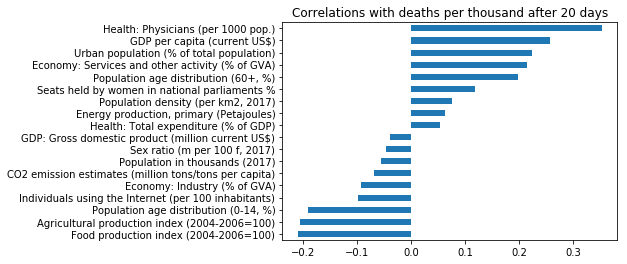

In [161]:
# plotting correlations with deaths per thousand after 20 days
title = 'Correlations with deaths per thousand after 20 days'
un_stats.corr().drop(['Deaths_Per_K_Day_20', col_n])['Deaths_Per_K_Day_20'].sort_values().plot('barh', title=title);

In [163]:
# getting correlation coefficients and their significance
get_corr_df(un_stats, corr_cols, 'Deaths_Per_K_Day_20')

,correlation,significance
Health: Physicians (per 1000 pop.),0.353702,0.000898
GDP per capita (current US$),0.257436,0.006883
Urban population (% of total population),0.223885,0.019270
Economy: Services and other activity (% of GVA),0.215178,0.024639
Food production index (2004-2006=100),-0.210160,0.031412
Agricultural production index (2004-2006=100),-0.206484,0.034572
"Population age distribution (60+, %)",0.198817,0.039135
"Population age distribution (0-14, %)",-0.191186,0.047472
Seats held by women in national parliaments %,0.117686,0.222937
Individuals using the Internet (per 100 inhabitants),-0.099066,0.305418


GDP (per capita) and age distribution continue to show a significant, albeit weak correlation to deaths when looking at the number per thousand.

Factors indicating a high degree of urbanization exhibit the same type of correlation. Urban areas are more dense and have more widespread risks of contagion such as crowded public transportation. We can also argue that in urban areas the coronavirus may be more frequently identified as a cause of death. Metrics showing more of a rural environment displayed that correlation in the opposite direction.

The most significant factor is also the most surprising one: the number of physicians shows a moderate, positive correlation with deaths per 1000 people. It may, however, not surprise us as much when we consider the role that a high number of physicians may play in correctly identifying and reporting the cause of death of individuals dying from the virus. We can also speculate that areas with more people in need of assistance of doctors, and at the same time more at risk of dying from the disease, such as the elderly, will display a higher number of doctors.